In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:
train=torchvision.datasets.CIFAR100(root='./Data', download=True,train=True,transform=transforms.ToTensor())
image,label = train[34]
label

100%|██████████| 169M/169M [00:03<00:00, 55.4MB/s]


21

/tmp/ipython-input-597614718.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)
  plt.imshow(image.T , interpolation='bicubic')


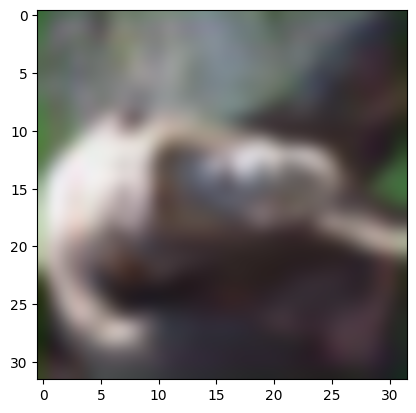

In [5]:
plt.imshow(image.T , interpolation='bicubic')

In [6]:
train_batch=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)

In [10]:
class DANN(nn.Module):
  def __init__(self, input_size,hidden_size1,hidden_size2,output_size):
     super(DANN,self).__init__()
     self.fc1=nn.Linear(input_size,hidden_size1)
     self.fc2=nn.Linear(hidden_size1,hidden_size2)
     self.fc3=nn.Linear(hidden_size2,output_size)
     self.relu=nn.ReLU()

  def forward(self,x):
    out=x.view(x.size(0),-1)
    out=self.fc1(out)
    out=self.relu(out)
    out=self.fc2(out)
    out=self.relu(out)
    out=self.fc3(out)
    return out

In [11]:
input_size=3*32*32
hidden_size1=128
hidden_size2=100
output_size=100
model=DANN(input_size,hidden_size1,hidden_size2,output_size)


In [12]:
critirion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
